<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
        Project - 3rd Phase
        <br />
        Image Colorization using Autoencoder
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99106758
            <br />
            Name = Mohammad Ali   
            <br />
            Last_Name = Hashemifar
        </div>
        <div class="column">
        <br />
            student_number = 99106114
            <br />
            Name = Mobin   
            <br />
            Last_Name = Khatib
        </div>
    </font>
    </div>


1. Download the "landscape image colorization" dataset and slice it to `train_set`, `validation_set` and `test_set`.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to colorize grayscale images
3. plot learning curve and visualize grayscale images of test set, their corresponding color images and their colorized versions side by side.

# Import Necessary Libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import save_image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder

# Load Dataset and Prepare It

In [ ]:
! pip install kaggle
#--------------------
! mkdir ~/.kaggle
#--------------------
! cp kaggle.json ~/.kaggle/
#--------------------
! chmod 600 ~/.kaggle/kaggle.json
#--------------------
! kaggle datasets download theblackmamba31/landscape-image-colorization
#--------------------
! unzip /content/landscape-image-colorization.zip

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = '/content/landscape Images'

color_dir = os.path.join(base_dir, 'color')
gray_dir = os.path.join(base_dir, 'gray')


color_images = os.listdir(color_dir)
gray_images = os.listdir(gray_dir)

#Split the data into training, validation, and test sets (60%, 20%, 20%)
train_color, test_color = train_test_split(color_images, test_size=0.2, random_state=1)
train_color, val_color = train_test_split(train_color, test_size=0.25, random_state=1)

train_gray, test_gray = train_test_split(gray_images, test_size=0.2, random_state=1)
train_gray, val_gray = train_test_split(train_gray, test_size=0.25, random_state=1)

train_color_dir = os.path.join(base_dir, 'train', 'color')
val_color_dir = os.path.join(base_dir, 'val', 'color')
test_color_dir = os.path.join(base_dir, 'test', 'color')

train_gray_dir = os.path.join(base_dir, 'train', 'gray')
val_gray_dir = os.path.join(base_dir, 'val', 'gray')
test_gray_dir = os.path.join(base_dir, 'test', 'gray')


In [4]:
os.makedirs(train_color_dir)
os.makedirs(val_color_dir)
os.makedirs(test_color_dir)

os.makedirs(train_gray_dir)
os.makedirs(val_gray_dir)
os.makedirs(test_gray_dir)


In [5]:
for image in train_color:
    src = os.path.join(color_dir, image)
    dst = os.path.join(train_color_dir, image)
    shutil.copyfile(src, dst)

for image in val_color:
    src = os.path.join(color_dir, image)
    dst = os.path.join(val_color_dir, image)
    shutil.copyfile(src, dst)

for image in test_color:
    src = os.path.join(color_dir, image)
    dst = os.path.join(test_color_dir, image)
    shutil.copyfile(src, dst)

for image in train_gray:
    src = os.path.join(gray_dir, image)
    dst = os.path.join(train_gray_dir, image)
    shutil.copyfile(src, dst)

for image in val_gray:
    src = os.path.join(gray_dir, image)
    dst = os.path.join(val_gray_dir, image)
    shutil.copyfile(src, dst)

for image in test_gray:
    src = os.path.join(gray_dir, image)
    dst = os.path.join(test_gray_dir, image)
    shutil.copyfile(src,dst)

In [6]:
import os
import shutil


folder_path1 = '/content/landscape Images/test/color'
folder_path2 = '/content/landscape Images/val/color'
folder_path3 = '/content/landscape Images/train/color'

folder_path11 = '/content/landscape Images/test/gray'
folder_path22 = '/content/landscape Images/val/gray'
folder_path33 = '/content/landscape Images/train/gray'





new_folder_path1 = os.path.join(folder_path1, 'color')
os.makedirs(new_folder_path1, exist_ok=True)
new_folder_path2 = os.path.join(folder_path2, 'color')
os.makedirs(new_folder_path2, exist_ok=True)
new_folder_path3 = os.path.join(folder_path3, 'gray')
os.makedirs(new_folder_path3, exist_ok=True)

new_folder_path11 = os.path.join(folder_path11, 'gray')
os.makedirs(new_folder_path11, exist_ok=True)
new_folder_path22 = os.path.join(folder_path22, 'gray')
os.makedirs(new_folder_path22, exist_ok=True)
new_folder_path33 = os.path.join(folder_path33, 'gray')
os.makedirs(new_folder_path33, exist_ok=True)




jpg_files1 = [file for file in os.listdir(folder_path1) if file.endswith('.jpg')]
jpg_files2 = [file for file in os.listdir(folder_path2) if file.endswith('.jpg')]
jpg_files3 = [file for file in os.listdir(folder_path3) if file.endswith('.jpg')]

jpg_files11 = [file for file in os.listdir(folder_path11) if file.endswith('.jpg')]
jpg_files22 = [file for file in os.listdir(folder_path22) if file.endswith('.jpg')]
jpg_files33 = [file for file in os.listdir(folder_path33) if file.endswith('.jpg')]




for file in jpg_files1:
    file_path = os.path.join(folder_path1, file)
    shutil.move(file_path, new_folder_path1)
for file in jpg_files2:
    file_path = os.path.join(folder_path2, file)
    shutil.move(file_path, new_folder_path2)
for file in jpg_files3:
    file_path = os.path.join(folder_path3, file)
    shutil.move(file_path, new_folder_path3)


for file in jpg_files11:
    file_path = os.path.join(folder_path11, file)
    shutil.move(file_path, new_folder_path11)
for file in jpg_files22:
    file_path = os.path.join(folder_path22, file)
    shutil.move(file_path, new_folder_path22)
for file in jpg_files33:
    file_path = os.path.join(folder_path33, file)
    shutil.move(file_path, new_folder_path33)


print("All JPG files have been moved to the new folder.")

All JPG files have been moved to the new folder.


# Define Your Model

In [31]:
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [32]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



transform1 = transforms.Compose([

    transforms.Resize((150, 150)),  # Resize the images to a common size
    transforms.ToTensor(),
])

transform2 = transforms.Compose([

    transforms.Resize((150, 150)),  # Resize the images to a common size
    transforms.Grayscale(),
    transforms.ToTensor(),
])




train_dataset1 = datasets.ImageFolder('landscape Images/train/color', transform=transform1)
train_loader1 = DataLoader(train_dataset1, batch_size=batch_size, shuffle=False)

train_dataset2 = datasets.ImageFolder('landscape Images/train/gray', transform=transform2)
train_loader2 = DataLoader(train_dataset2, batch_size=batch_size, shuffle=False)


test_dataset1 = datasets.ImageFolder('landscape Images/test/color', transform=transform1)
test_loader1 = DataLoader(test_dataset1, batch_size=batch_size, shuffle=False)

test_dataset2 = datasets.ImageFolder('landscape Images/test/gray', transform=transform2)
test_loader2 = DataLoader(test_dataset2, batch_size=batch_size, shuffle=False)


val_dataset1 = datasets.ImageFolder('landscape Images/val/color', transform=transform1)
val_loader1 = DataLoader(val_dataset1, batch_size=batch_size, shuffle=False)

val_dataset2 = datasets.ImageFolder('landscape Images/val/gray', transform=transform2)
val_loader2 = DataLoader(val_dataset2, batch_size=batch_size, shuffle=False)


# Fit The Model

Also Define optimizer, Criterion and other parameters

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [35]:
import torch.optim as optim

autoencoder = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)


In [36]:
num_epochs = 12
train_loader1_list = list(train_loader1)
train_loader2_list = list(train_loader2)

losses = []  # List to store the loss values

for epoch in range(num_epochs):
    epoch_loss = 0.0  # Variable to track the loss for each epoch
    for i in range(len(train_loader2_list)):
        #Forward
        gray_img = train_loader2_list[i][0].to(device)
        output = autoencoder(gray_img)
        color_img = train_loader1_list[i][0].to(device)
        loss = criterion(output, color_img)
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(train_loader2_list)  # Average loss for the epoch
    losses.append(epoch_loss)  # Store the loss value
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/12], Loss: 0.0087
Epoch [2/12], Loss: 0.0065
Epoch [3/12], Loss: 0.0057
Epoch [4/12], Loss: 0.0048
Epoch [5/12], Loss: 0.0047
Epoch [6/12], Loss: 0.0044
Epoch [7/12], Loss: 0.0042
Epoch [8/12], Loss: 0.0046
Epoch [9/12], Loss: 0.0049
Epoch [10/12], Loss: 0.0048
Epoch [11/12], Loss: 0.0044
Epoch [12/12], Loss: 0.0043


# Plot The Results

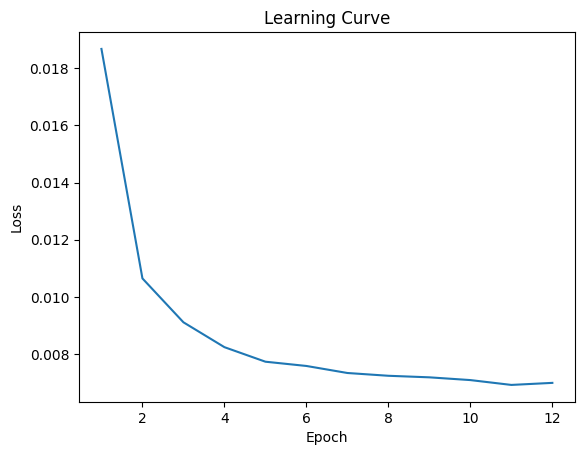

In [37]:
import matplotlib.pyplot as plt
# Plot the learning curve
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

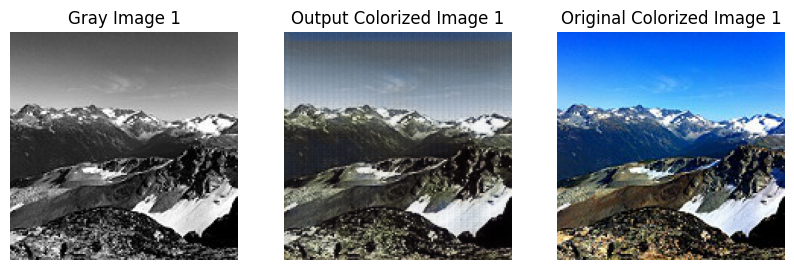

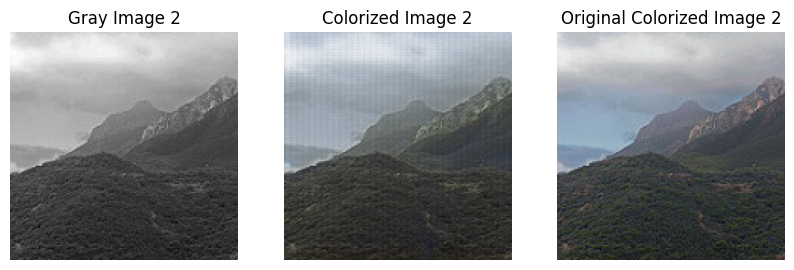

In [38]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Selcet 2 random gray images from Test database
gray_image_path1 = '/content/landscape Images/test/gray/gray/1006.jpg'
gray_image_path2 = '/content/landscape Images/test/gray/gray/1000.jpg'
color_image_path1 = '/content/landscape Images/test/color/color/1006.jpg'
color_image_path2 = '/content/landscape Images/test/color/color/1000.jpg'




gray_image1 = Image.open(gray_image_path1).convert('L')
gray_image2 = Image.open(gray_image_path2).convert('L')
color_image1 = Image.open(color_image_path1)
color_image2 = Image.open(color_image_path2)

preprocess = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor()
])

gray_image_tensor1 = preprocess(gray_image1).unsqueeze(0)
gray_image_tensor2 = preprocess(gray_image2).unsqueeze(0)


gray_image_tensor1 = gray_image_tensor1.to(device)
gray_image_tensor2 = gray_image_tensor2.to(device)

autoencoder.eval()
with torch.no_grad():
    output_image_tensor1 = autoencoder(gray_image_tensor1)
    output_image_tensor2 = autoencoder(gray_image_tensor2)


output_image_tensor1 = output_image_tensor1.cpu()
output_image_tensor2 = output_image_tensor2.cpu()

output_image1 = transforms.ToPILImage()(output_image_tensor1.squeeze(0))
output_image2 = transforms.ToPILImage()(output_image_tensor2.squeeze(0))

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(gray_image1, cmap='gray')
axes[0].set_title('Gray Image 1')
axes[0].axis('off')

axes[1].imshow(output_image1)
axes[1].set_title('Output Colorized Image 1')
axes[1].axis('off')

axes[2].imshow(color_image1)
axes[2].set_title('Original Colorized Image 1')
axes[2].axis('off')


fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(gray_image2, cmap='gray')
axes[0].set_title('Gray Image 2')
axes[0].axis('off')

axes[1].imshow(output_image2)
axes[1].set_title('Colorized Image 2')
axes[1].axis('off')

axes[2].imshow(color_image2)
axes[2].set_title('Original Colorized Image 2')
axes[2].axis('off')


plt.show()
